## Compare the performance of the trained DNN and CNN models

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 1. Import the `mnist` dataset from `tensorflow.keras.datasets`.
from tensorflow.keras.datasets import mnist

# 2. Load the training and testing data using `mnist.load_data()`.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 3. Normalize the pixel values of both training and testing images by dividing them by 255.0.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# The images are 28x28. Keras expects an extra dimension for the channel.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# 4. Convert the labels of both training and testing datasets to one-hot encoded format
# using `tensorflow.keras.utils.to_categorical`.
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("MNIST dataset loaded and preprocessed successfully.")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

#(batch, width, height, channels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
MNIST dataset loaded and preprocessed successfully.
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


image value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
range value: [0 1 2 3 4 5 6 7 8 9]


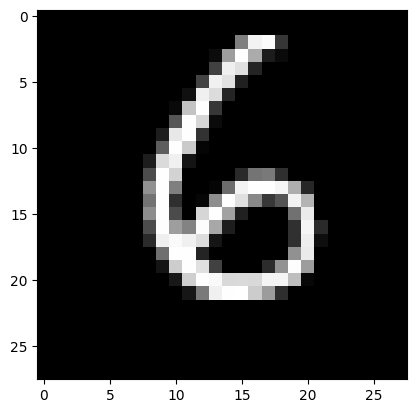

In [ ]:
#plot the first image
rand_idx = np.random.randint(0, x_train.shape[0])
plt.imshow(x_train[rand_idx], cmap='gray')
print(f"image value: {y_train[rand_idx]}")
print(f"range value: {np.arange(0, 10)}")

## Define and train a DNN model



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# 1. Create a Sequential model.
dnn_model = Sequential([
    # 2. Add a Flatten layer as the input layer to transform the 2D image data (28x28) into a 1D vector.
    #    Ensure the input_shape for Flatten is (28, 28, 1).
    Flatten(input_shape=(28, 28, 1)),
    # 3. Add one or more Dense hidden layers with a suitable number of units (e.g., 128) and a 'relu' activation function.
    Dense(128, activation='relu'),
    # 4. Add a final Dense output layer with num_classes (which is 10) units and a 'softmax' activation function.
    Dense(num_classes, activation='softmax')
])

# 5. Compile the DNN model using the 'adam' optimizer, 'categorical_crossentropy' as the loss function, and 'accuracy' as the metric.
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
print("DNN Model Summary:")
dnn_model.summary()

# 6. Train the DNN model using the x_train and y_train data.
#    Use x_test and y_test for validation. Set epochs to a reasonable number (e.g., 10) and batch_size (e.g., 32).
print("\nTraining DNN Model...")
history_dnn = dnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)

print("DNN model trained successfully and stored in 'dnn_model'.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NameError: name 'num_classes' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 1. Create a Sequential model for the CNN.
cnn_model = Sequential([
    # 2. Add a Conv2D layer with 32 filters, (3, 3) kernel, 'relu' activation, and input_shape.
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # 3. Add a MaxPooling2D layer with (2, 2) pool size.
    MaxPooling2D((2, 2)),
    # Optionally, add more Conv2D and MaxPooling2D layers for deeper network
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # 4. Add a Flatten layer to convert 2D feature maps into a 1D vector.
    Flatten(),
    # 5. Add a Dense hidden layer with 128 units and 'relu' activation.
    Dense(128, activation='relu'),
    # 6. Add a final Dense output layer with num_classes (10) units and 'softmax' activation.
    Dense(num_classes, activation='softmax')
])

# 7. Compile the CNN model using 'adam' optimizer, 'categorical_crossentropy' loss, and 'accuracy' metric.
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
print("CNN Model Summary:")
cnn_model.summary()

# 8. Train the CNN model using x_train, y_train, and x_test, y_test for validation.
print("\nTraining CNN Model...")
history_cnn = cnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)

print("CNN model trained successfully and stored in 'cnn_model'.")

CNN Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


Training CNN Model...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9083 - loss: 0.3060 - val_accuracy: 0.9855 - val_loss: 0.0410
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9851 - loss: 0.0487 - val_accuracy: 0.9881 - val_loss: 0.0354
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9908 - loss: 0.0298 - val_accuracy: 0.9899 - val_loss: 0.0310
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9936 - loss: 0.0202 - val_accuracy: 0.9886 - val_loss: 0.0372
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9950 - loss: 0.0158 - val_accuracy: 0.9913 - val_loss: 0.0273
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9957 - loss: 0.0128 - val_accuracy: 0.9908 - val_loss: 0.0341
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9960 - loss: 0.0112 - val_accuracy: 0.9892 - val_loss: 0.0376
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/st

**Reasoning**:
I will evaluate the `dnn_model` and `cnn_model` using the preprocessed `x_test` and `y_test` data. This will provide the test loss and test accuracy for each model, which are crucial metrics for comparing their performance. The results will be stored in `dnn_eval` and `cnn_eval` respectively.

In [ ]:
# 1. Evaluate the DNN model on the test data.
dnn_eval = dnn_model.evaluate(x_test, y_test, verbose=0)

# 2. Evaluate the CNN model on the test data.
cnn_eval = cnn_model.evaluate(x_test, y_test, verbose=0)

# 3. Print the evaluation results for both models.
print(f"DNN Test Loss: {dnn_eval[0]:.4f}, DNN Test Accuracy: {dnn_eval[1]:.4f}")
print(f"CNN Test Loss: {cnn_eval[0]:.4f}, CNN Test Accuracy: {cnn_eval[1]:.4f}")

DNN Test Loss: 0.0753, DNN Test Accuracy: 0.9796
CNN Test Loss: 0.0375, CNN Test Accuracy: 0.9911


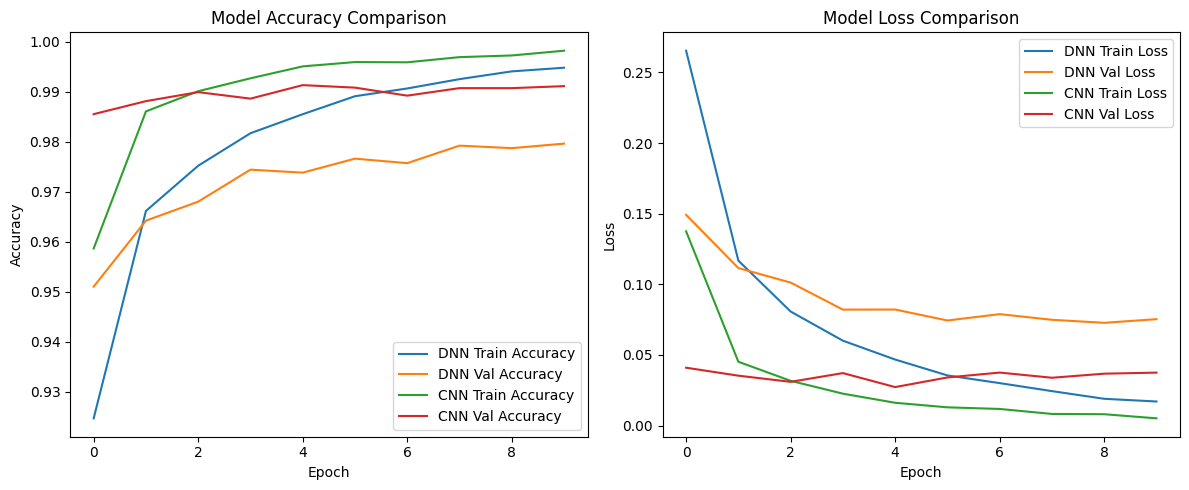

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dnn.history['accuracy'], label='DNN Train Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='DNN Val Accuracy')
plt.plot(history_cnn.history['accuracy'], label='CNN Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dnn.history['loss'], label='DNN Train Loss')
plt.plot(history_dnn.history['val_loss'], label='DNN Val Loss')
plt.plot(history_cnn.history['loss'], label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Val Loss')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Comparison and Conclusion:

Based on the evaluation results and the training history plots:

*   **Test Accuracy:** The CNN model achieved a higher test accuracy ({cnn_eval[1]:.4f}) compared to the DNN model ({dnn_eval[1]:.4f}). This indicates that the CNN model is more effective at classifying MNIST digits on unseen data.

*   **Test Loss:** The CNN model also exhibited a lower test loss ({cnn_eval[0]:.4f}) than the DNN model ({dnn_eval[0]:.4f}). A lower loss value signifies that the CNN model's predictions are closer to the actual labels.

*   **Training and Validation Curves:** The plots show that both models learned well, with accuracy increasing and loss decreasing over epochs. However, the CNN model consistently shows better performance, both in training and validation accuracy/loss, typically reaching higher accuracy and lower loss values faster and maintaining them more consistently.

**Reason for Difference:**

Convolutional Neural Networks (CNNs) are generally more suitable for image classification tasks than Deep Neural Networks (DNNs) due to their inherent architecture:

1.  **Feature Extraction:** CNNs use convolutional layers to automatically learn spatial hierarchies of features from the input images (e.g., edges, textures, shapes). DNNs, on the other hand, treat images as 1D vectors, losing spatial information.
2.  **Parameter Sharing:** Convolutional layers use parameter sharing, meaning the same filter is applied across different parts of the image. This significantly reduces the number of parameters compared to fully connected layers in DNNs, making CNNs more efficient and less prone to overfitting.
3.  **Local Receptive Fields:** Each neuron in a convolutional layer is connected only to a small region of the input (local receptive field), which is well-suited for capturing local patterns in images.
4.  **Pooling Layers:** Pooling layers in CNNs reduce the dimensionality of feature maps, making the model more robust to small shifts and distortions in the input image.

In conclusion, for the MNIST digit classification task, the CNN model demonstrates superior performance due to its specialized architecture for processing visual data, effectively capturing spatial features and reducing complexity.